In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_pickle('../data/cleaned_train.pkl')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
cat = pd.read_pickle('../data/cleaned_train.pkl')
cat = cat.select_dtypes(include=np.object)
cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
5,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [4]:
data = data.select_dtypes(include='int64')
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


In [5]:
data = data.drop(labels=['LotArea','LowQualFinSF','BsmtUnfSF','TotalBsmtSF',
                         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                         'GarageArea', 'WoodDeckSF','OpenPorchSF','PoolArea',
                         'MiscVal','SalePrice','BsmtFinSF1','BsmtFinSF2',
                         'EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)
data.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
Id,,,,,,,,,,,,,,,,
1,60,7,5,2003,2003,1,0,2,1,3,1,8,0,2,2,2008
2,20,6,8,1976,1976,0,1,2,0,3,1,6,1,2,5,2007
3,60,7,5,2001,2002,1,0,2,1,3,1,6,1,2,9,2008
4,70,7,5,1915,1970,1,0,1,0,3,1,7,1,3,2,2006
5,60,8,5,2000,2000,1,0,2,1,4,1,9,1,3,12,2008


In [6]:
# sample space
S = {column:pd.unique(data[column]) for column in data.columns}
S

{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40], dtype=int64),
 'OverallQual': array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64),
 'OverallCond': array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64),
 'YearBuilt': array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
        2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
        2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
        1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
        1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
        1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
        1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
        1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
        1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
        1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 18

In [7]:
S_1 = {column:pd.unique(cat[column]) for column in cat.columns}
S_1

{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array(['None', 'Grvl', 'Pave'], dtype=object),
 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Arte

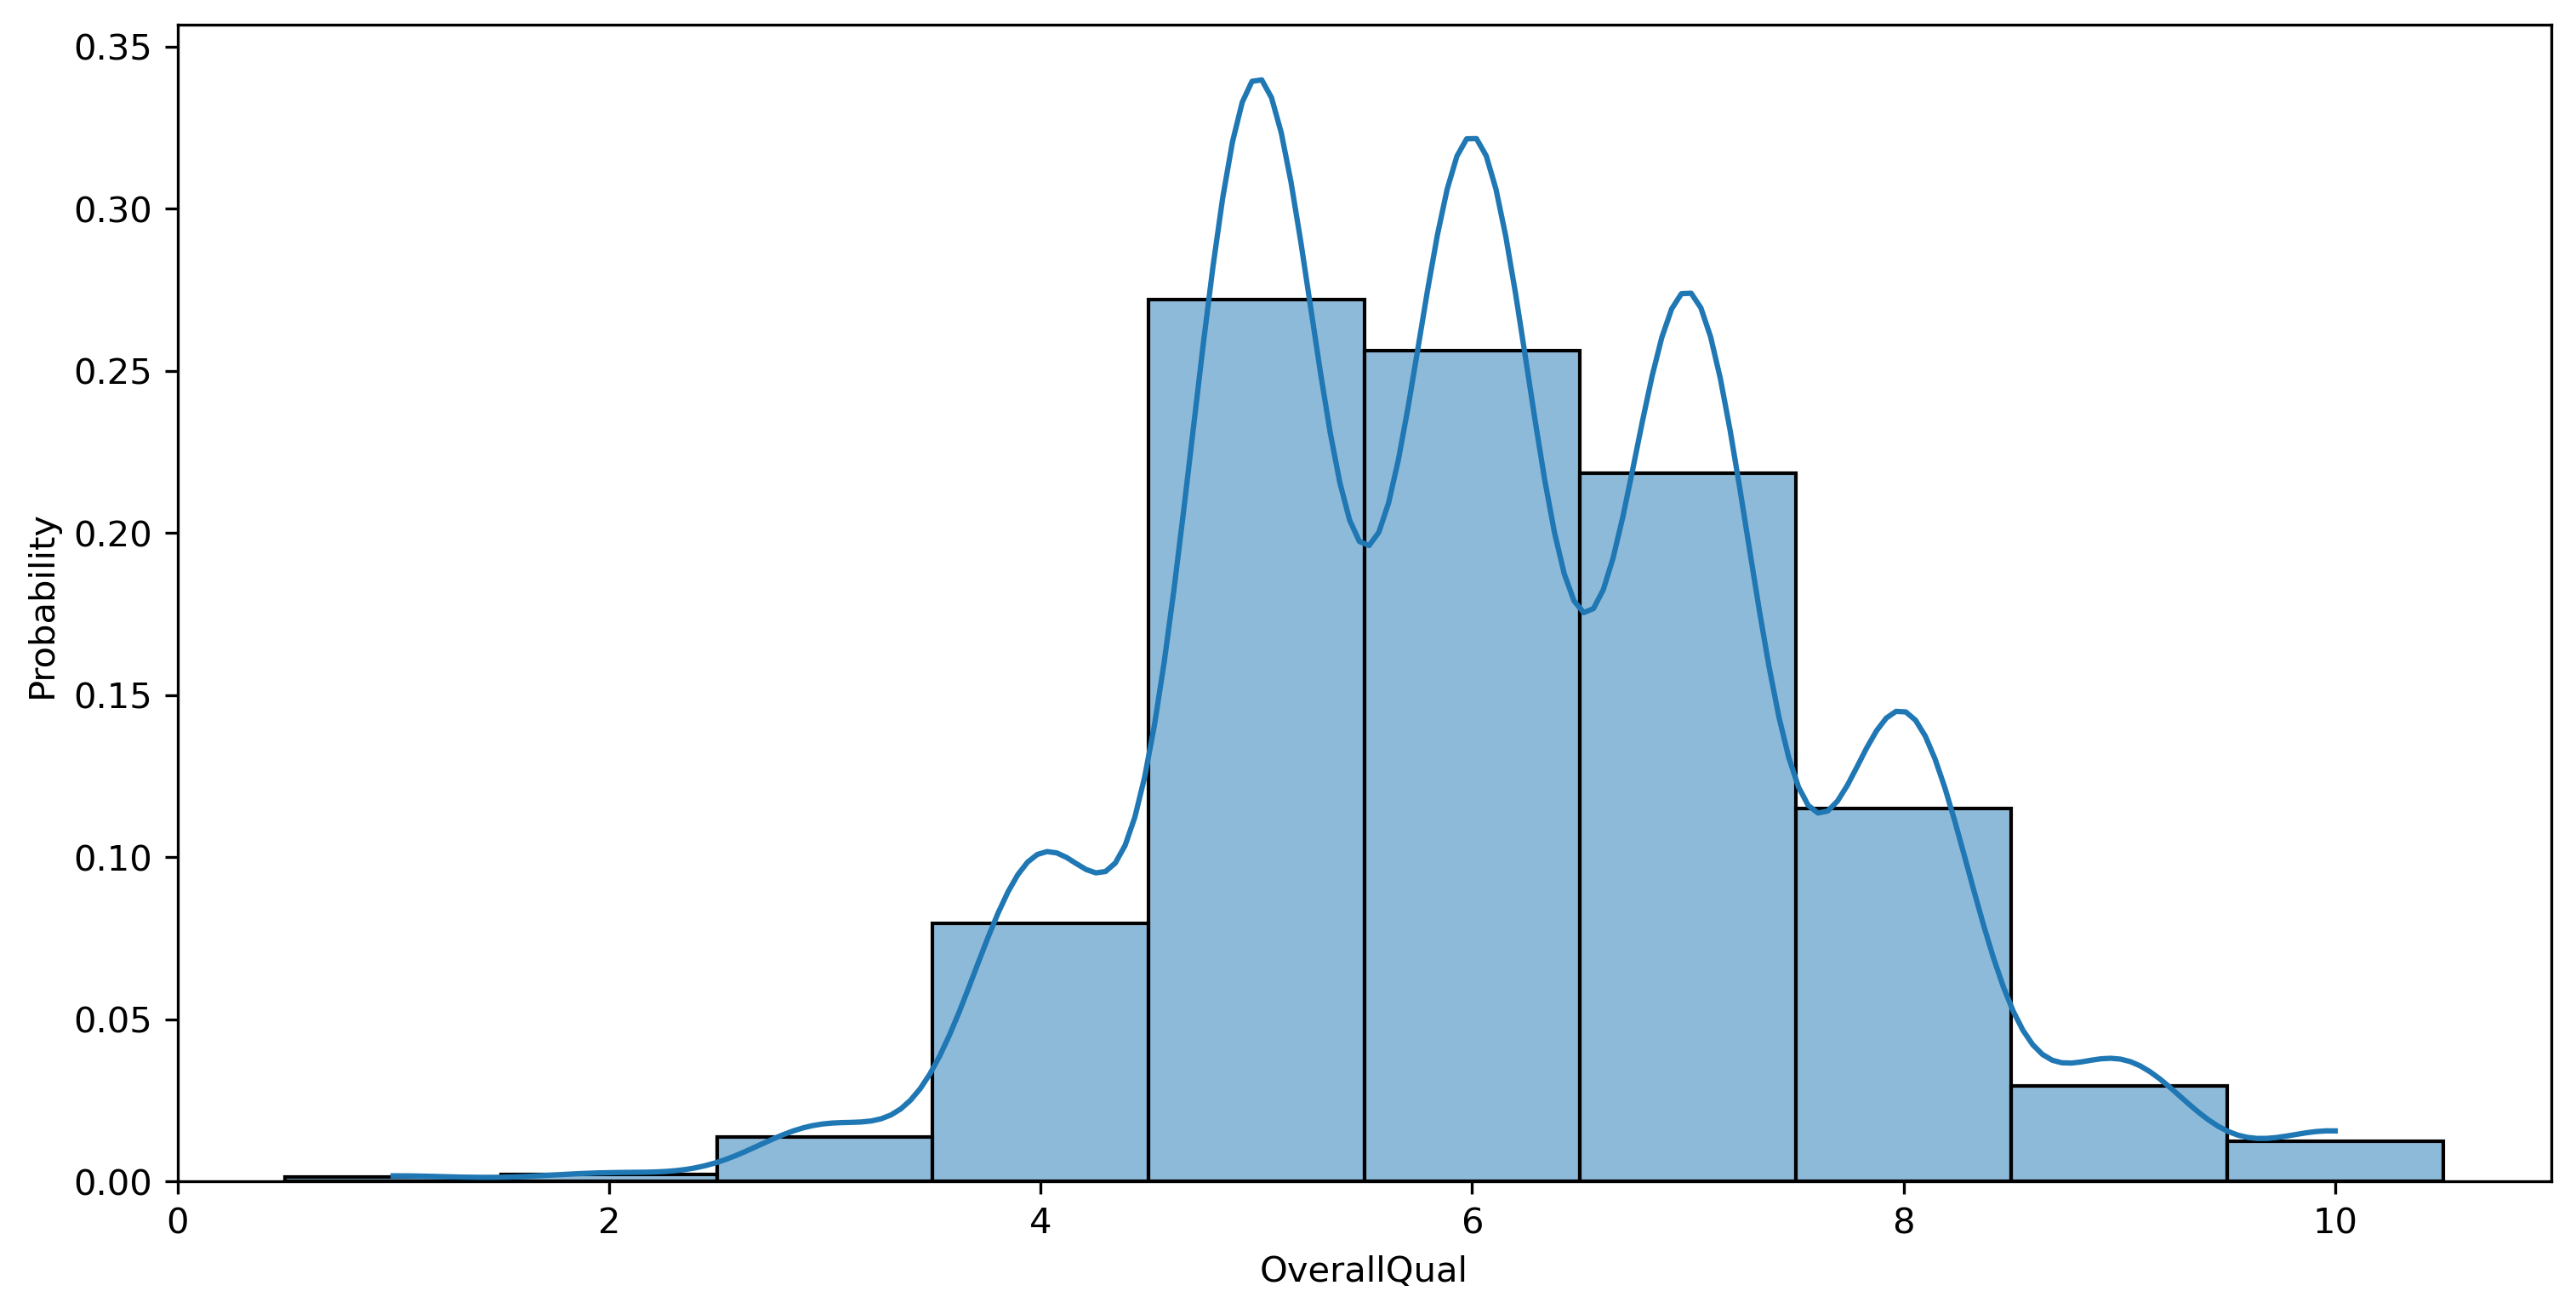

In [24]:
bins = 2 * (ss.iqr(data['OverallQual'])) ** (-1/3)

plt.figure(figsize=[12,6],dpi=300)
sns.histplot(x=data['OverallQual'],binwidth=bins,kde=True,discrete=True,stat='probability')
plt.show()

In [8]:
# probability distribution
fig,axes = plt.subplots(nrows=8,ncols=2,figsize=[36,72],dpi=300)
ax = axes.ravel()
columns = data.columns

for i in range(len(columns)):
    x = data[columns[i]].value_counts().index
    y = (data[columns[i]].value_counts()/data.shape[0]).values
    ax[i].plot(x,y,'o')
    ax[i].vlines(x,0,y,lw=1)
    ax[i].set_xlabel(columns[i])

plt.show()

In [9]:
# cumulative distribution function
CDF = pd.DataFrame((data['OverallQual'].value_counts()/data.shape[0]).reset_index()).sort_values(by='index')
CDF

,index,OverallQual
9,1,0.001370
8,2,0.002055
6,3,0.013699
4,4,0.079452
0,5,0.271918
1,6,0.256164
2,7,0.218493
3,8,0.115068
5,9,0.029452
7,10,0.012329


In [10]:
CDF['cdf'] = CDF['OverallQual'].cumsum()
CDF

,index,OverallQual,cdf
9,1,0.001370,0.001370
8,2,0.002055,0.003425
6,3,0.013699,0.017123
4,4,0.079452,0.096575
0,5,0.271918,0.368493
1,6,0.256164,0.624658
2,7,0.218493,0.843151
3,8,0.115068,0.958219
5,9,0.029452,0.987671
7,10,0.012329,1.000000


In [11]:
CDF.set_index(keys=['index'],inplace=True)

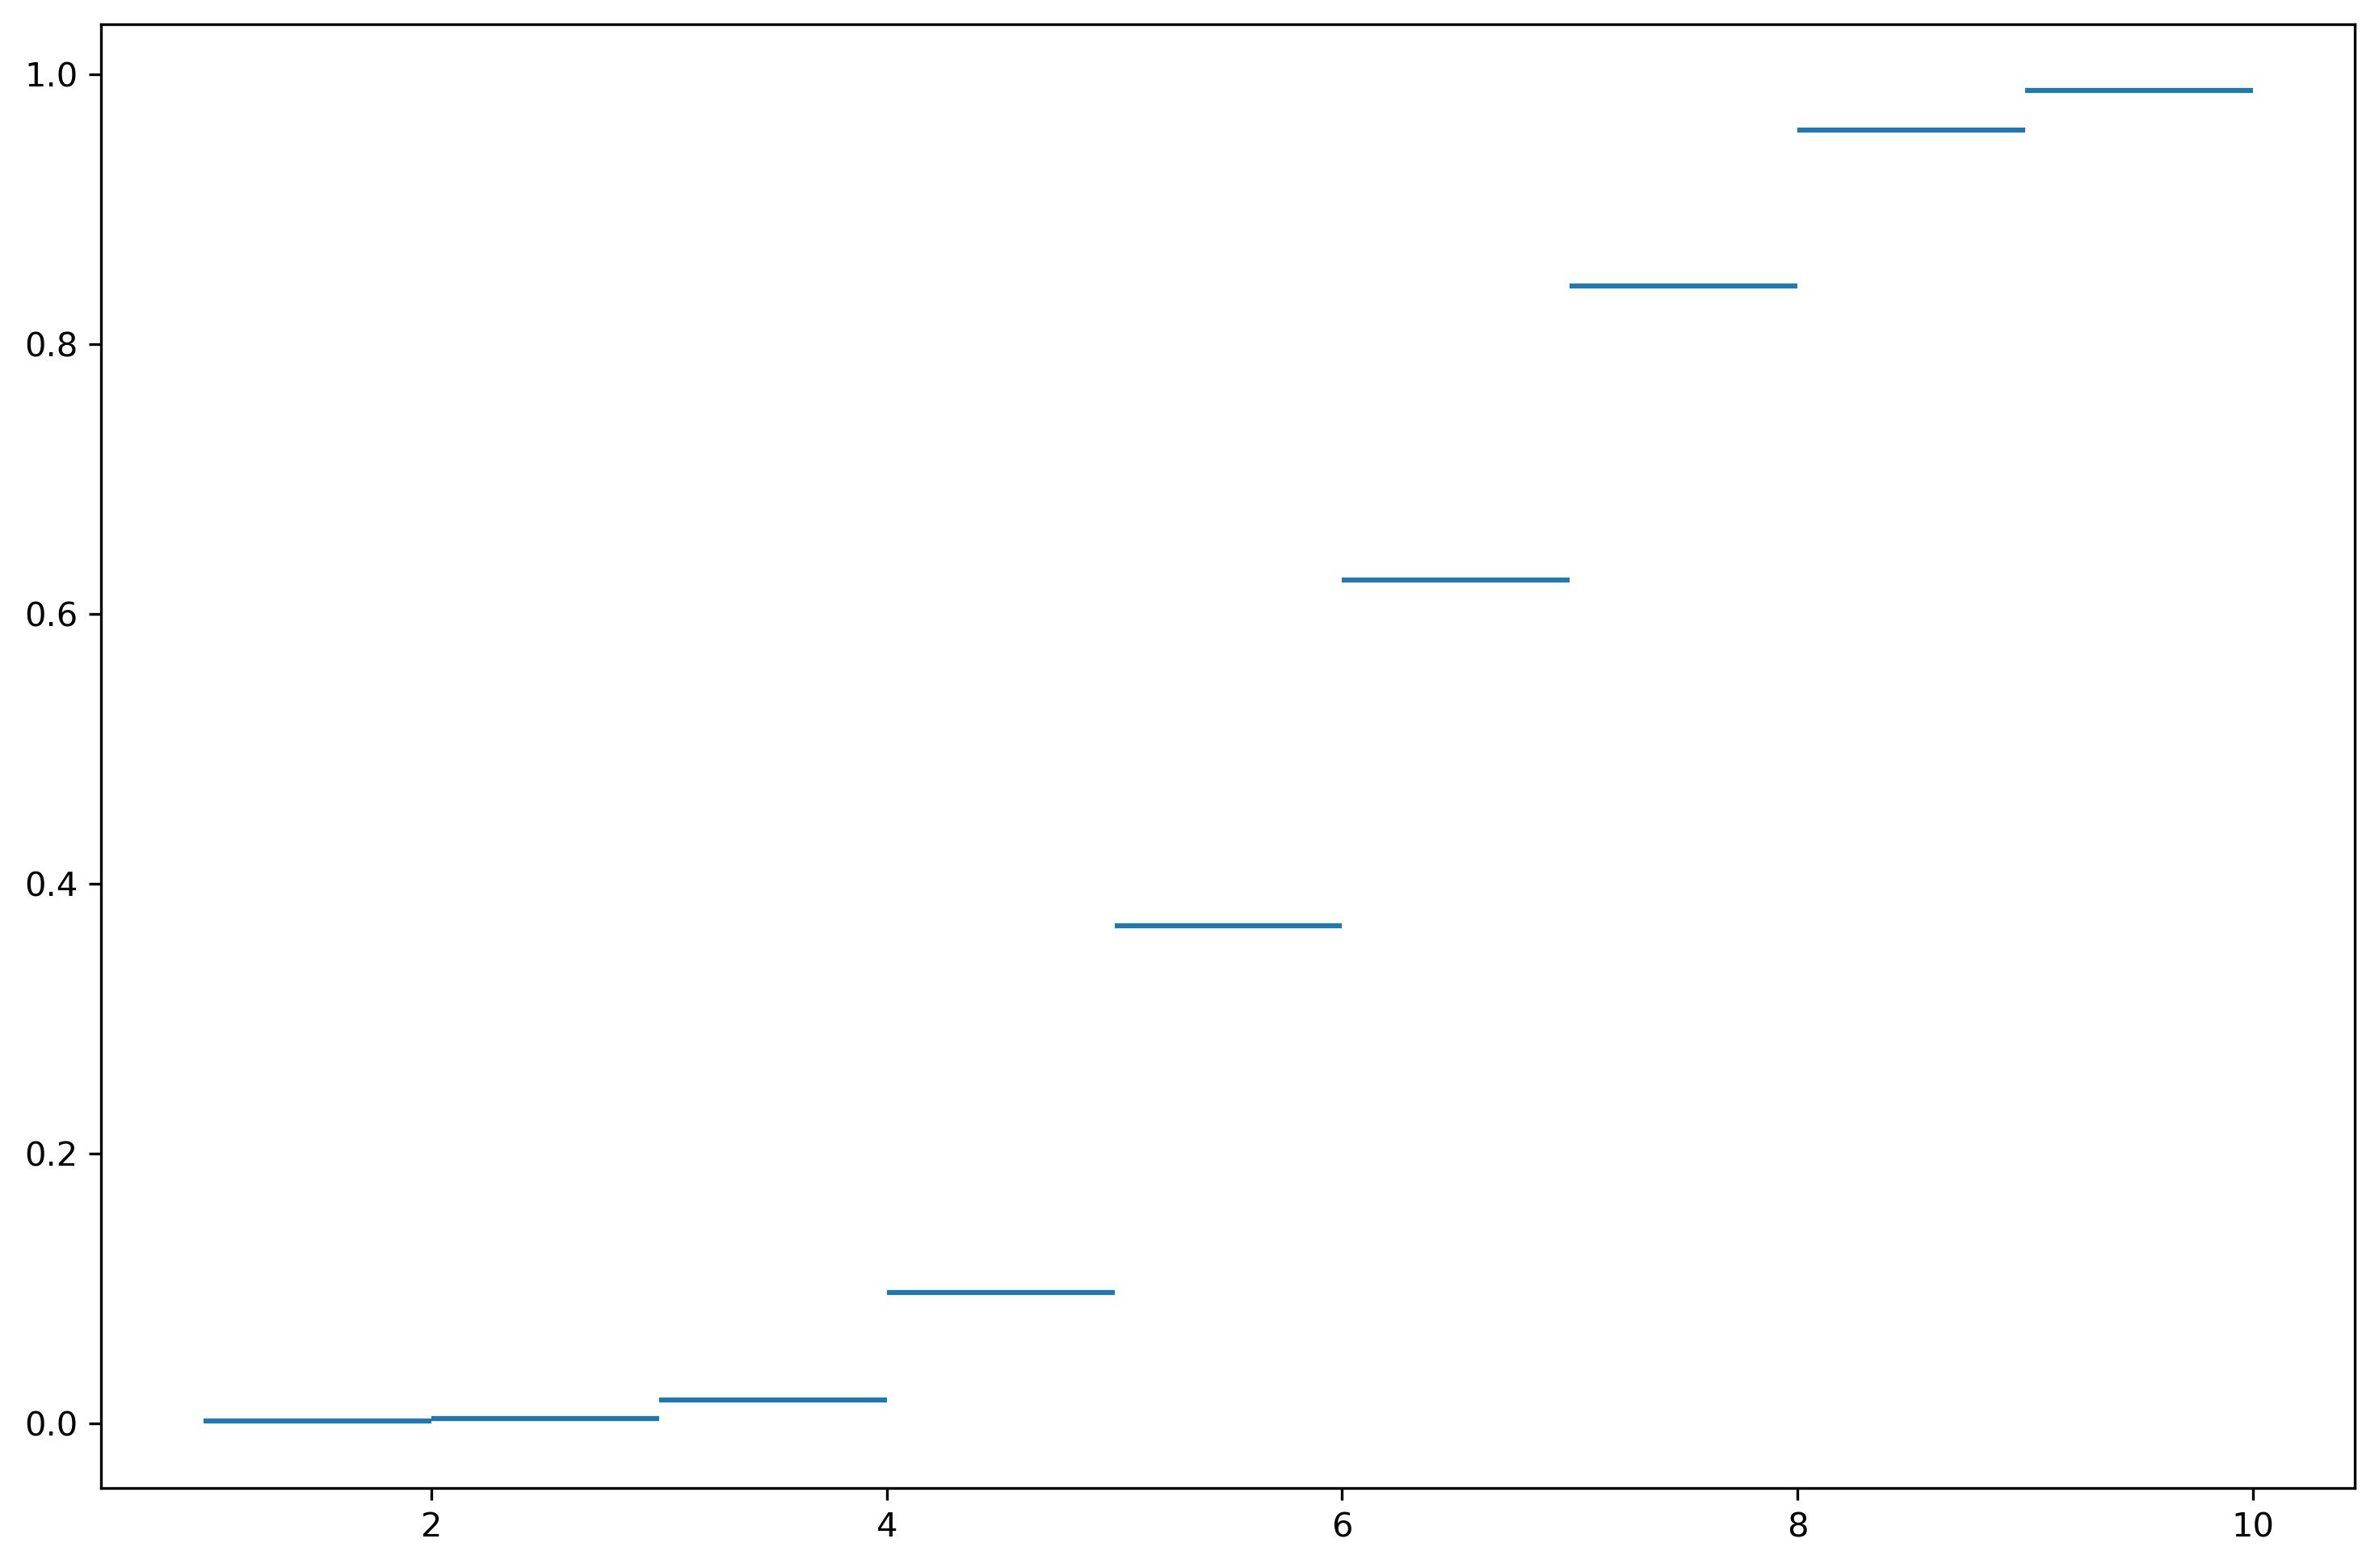

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=[12,8],dpi=300)
for i in range(1,10):
    ax.hlines(xmin=i,xmax=i+1,y=CDF.loc[i,'cdf'])

plt.show()

In [13]:
# weighted mean and variance in decorate variable
CDF['xf(x)'] = CDF['OverallQual']*np.arange(1,11,1)
CDF

,OverallQual,cdf,xf(x)
index,,,
1,0.001370,0.001370,0.001370
2,0.002055,0.003425,0.004110
3,0.013699,0.017123,0.041096
4,0.079452,0.096575,0.317808
5,0.271918,0.368493,1.359589
6,0.256164,0.624658,1.536986
7,0.218493,0.843151,1.529452
8,0.115068,0.958219,0.920548
9,0.029452,0.987671,0.265068


In [14]:
print(f"weighted mean = {np.sum(CDF['xf(x)'])}")

weighted mean = 6.0993150684931505


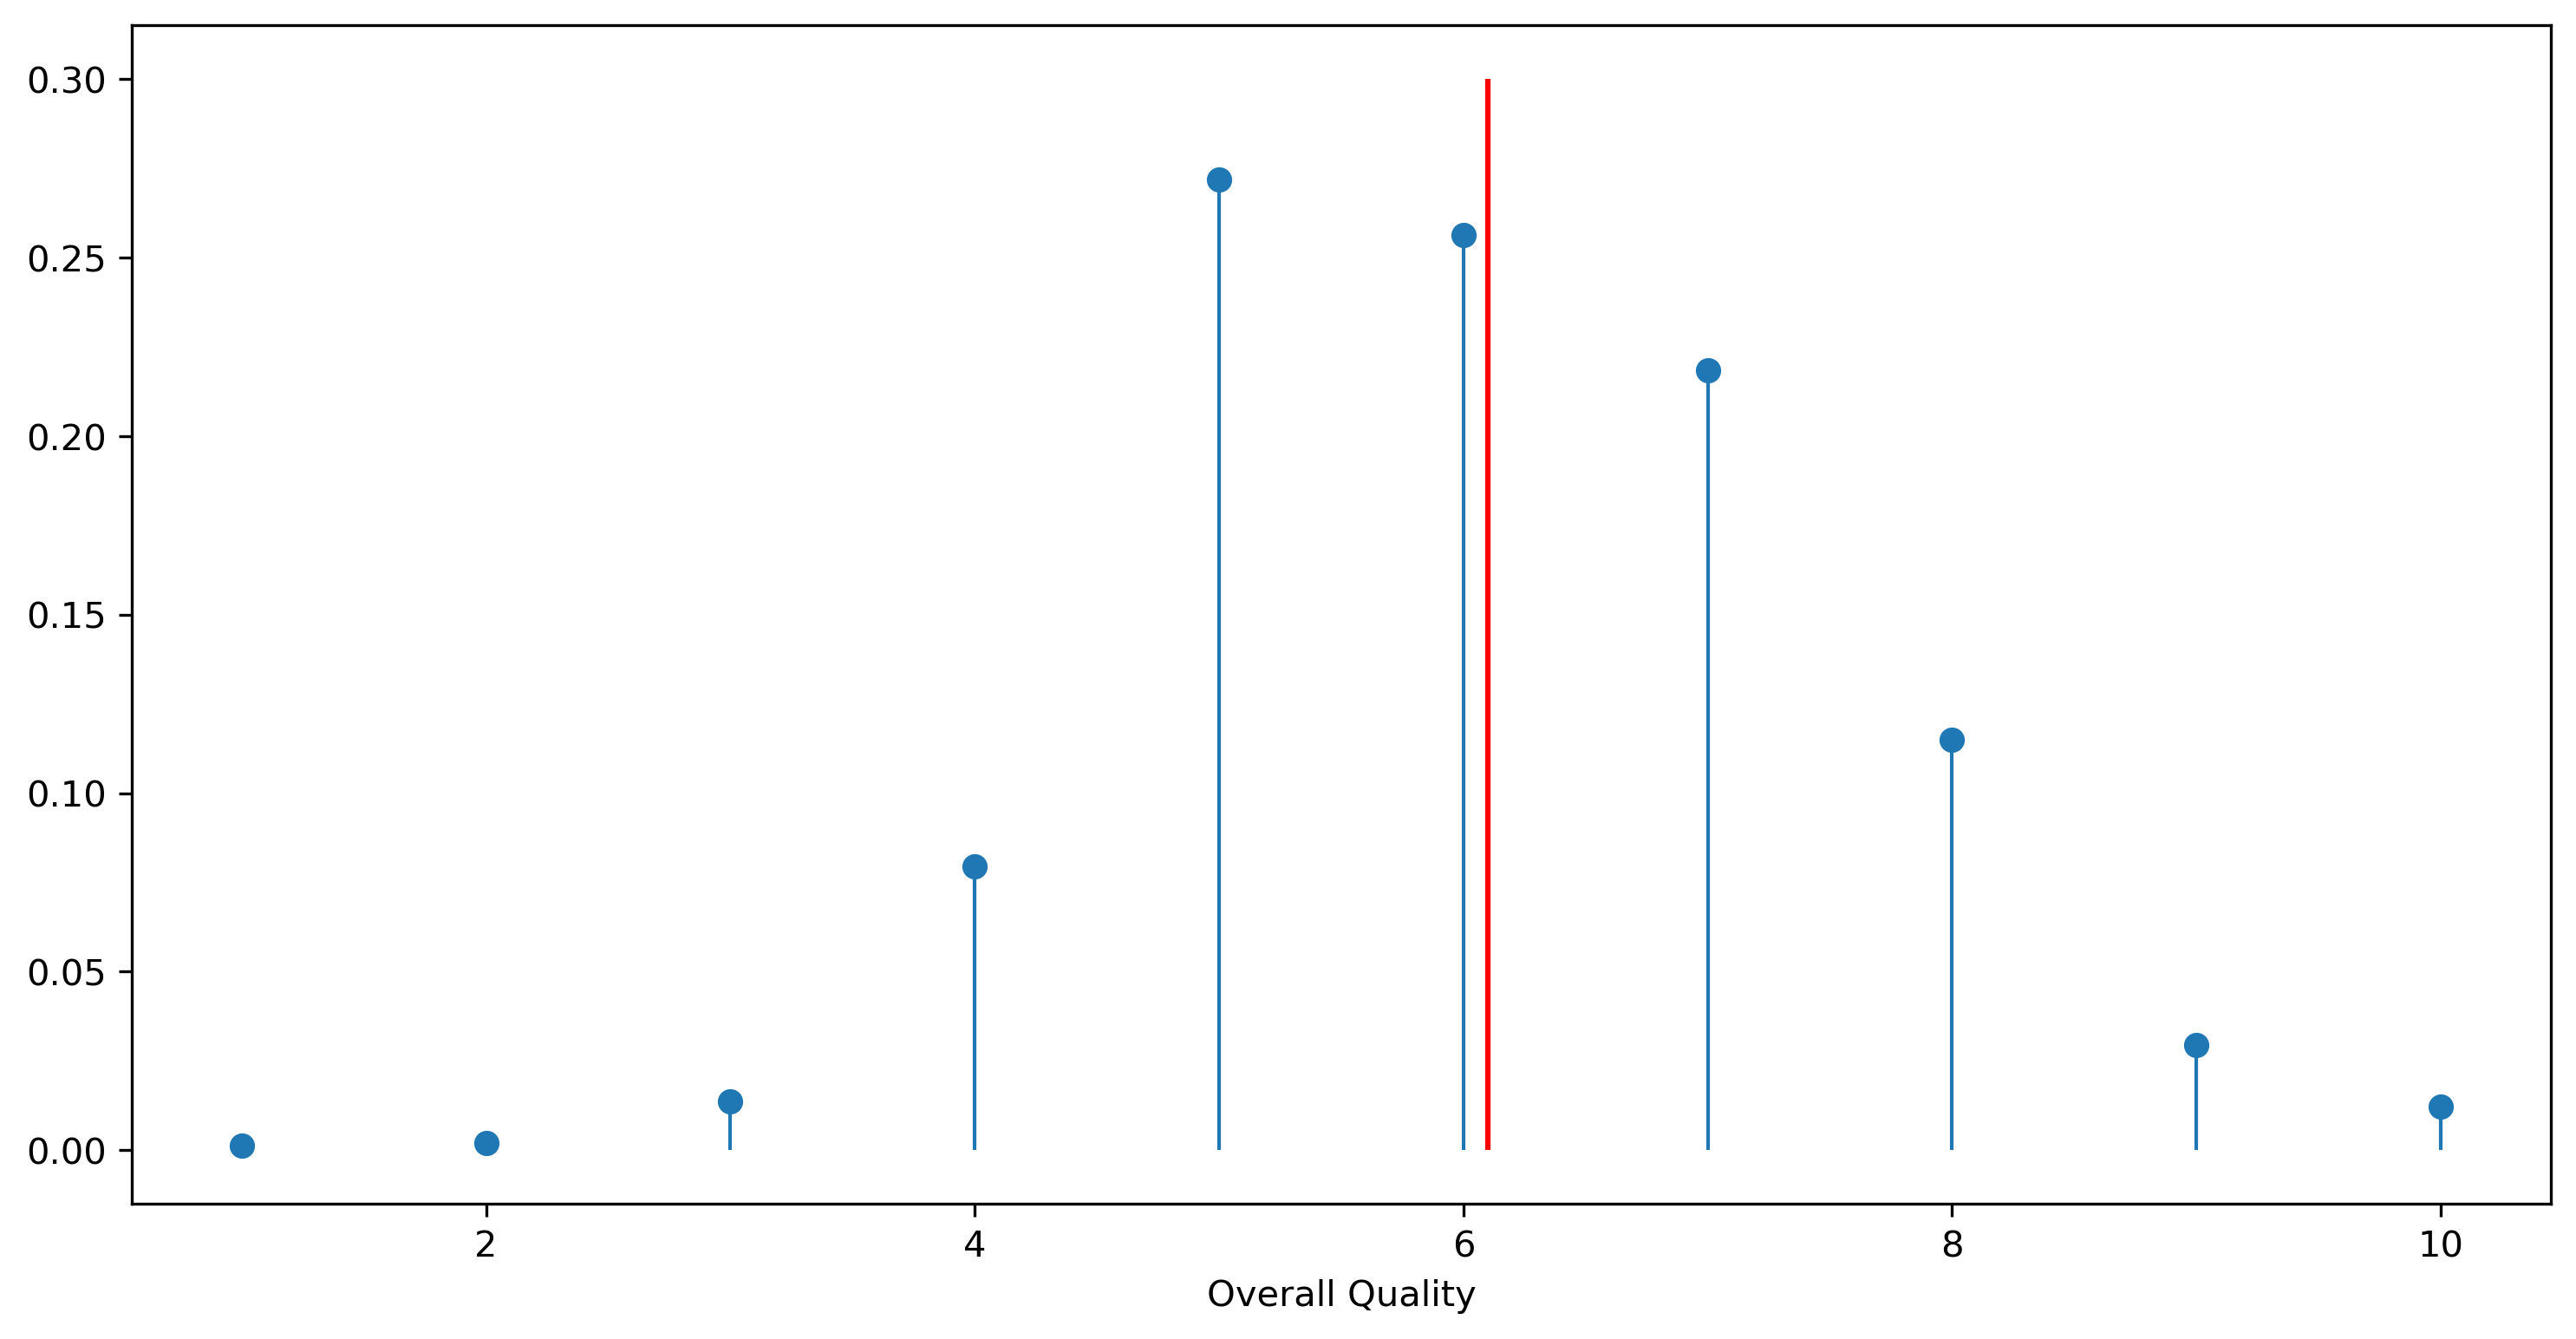

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[12,6],dpi=300)
x = data['OverallQual'].value_counts().index
y = (data['OverallQual'].value_counts()/data.shape[0]).values
ax.plot(x,y,'o')
ax.vlines(x,0,y,lw=1)
ax.vlines(np.sum(CDF['xf(x)']),0,0.3,color='r')
ax.set_xlabel('Overall Quality')
plt.show()

In [16]:
# variance
mean = np.sum(CDF['OverallQual']*np.arange(1,11,1))
var = np.sum(np.square(np.arange(1,11,1) - mean)*CDF['OverallQual'])
std_var = np.sqrt(var)

print(f"variance = {var} standard deviation = {std_var}")

variance = 1.9113693938825296 standard deviation = 1.3825228366585955


In [17]:
cat['CentralAir'] = cat['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
cat['CentralAir']

Id
1       1
2       1
3       1
4       1
5       1
       ..
1456    1
1457    1
1458    1
1459    1
1460    1
Name: CentralAir, Length: 1460, dtype: int64

In [18]:
cat['CentralAir'].value_counts()/cat['CentralAir'].shape[0]

1    0.934932
0    0.065068
Name: CentralAir, dtype: float64

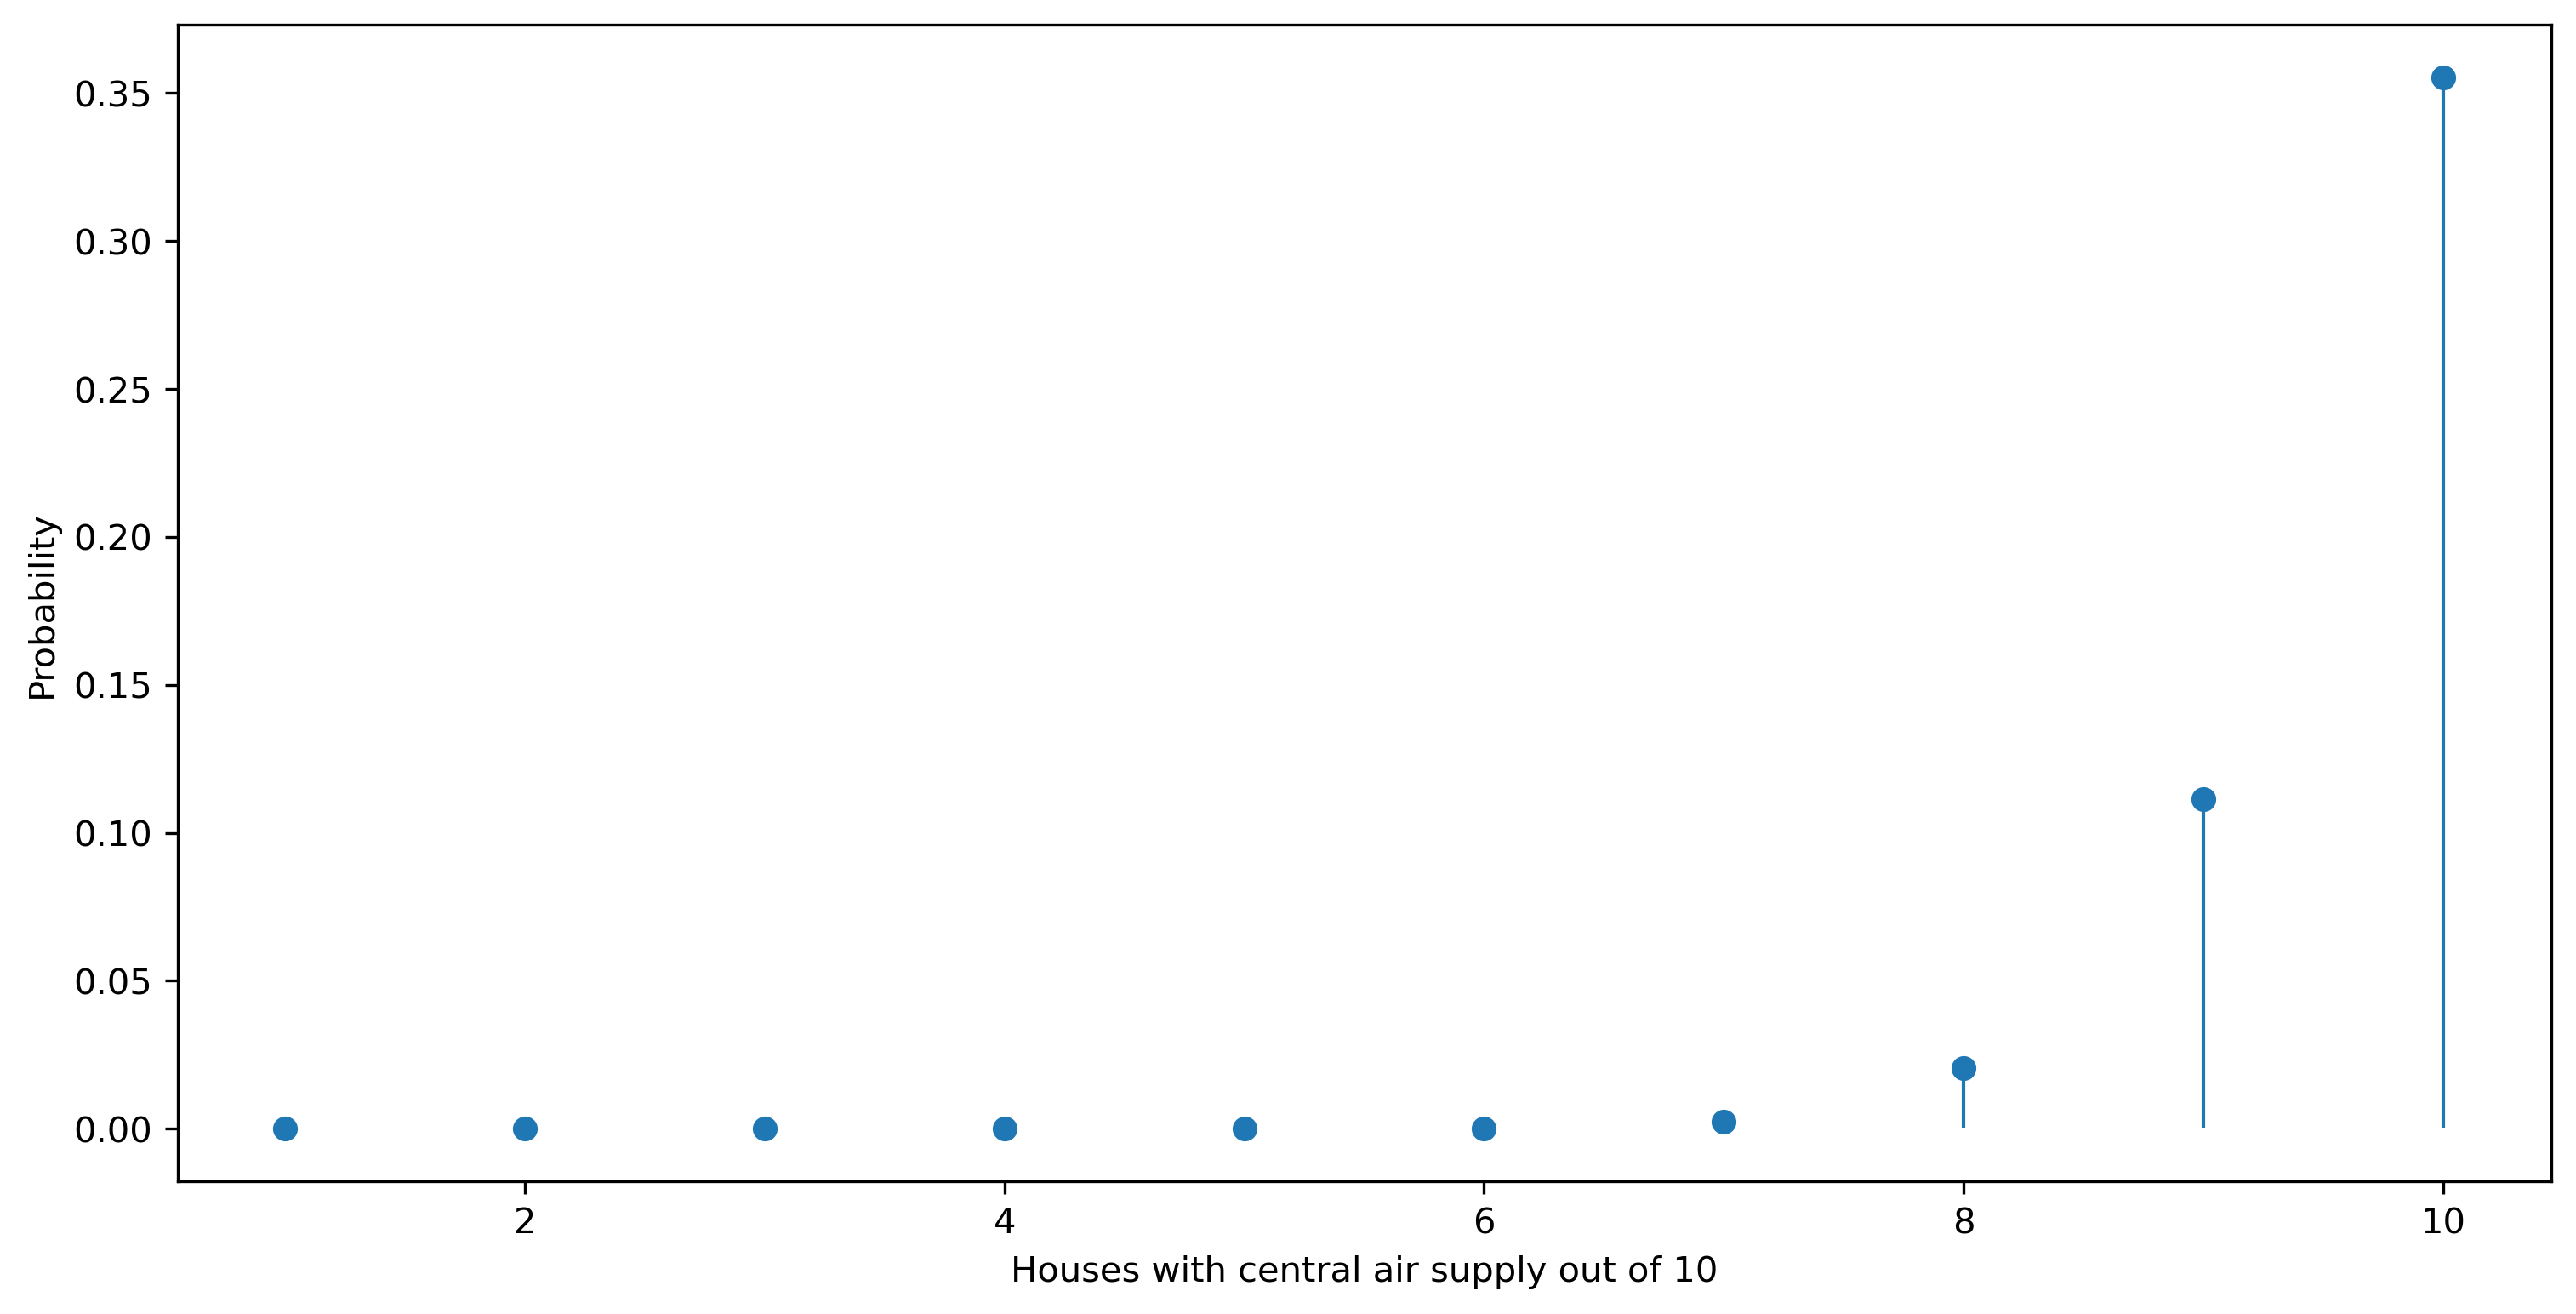

In [30]:
# if we consider 10 houses probability of there centralized air 10 out of 10

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[12,6],dpi=300)
x = np.arange(1,11,1)
y = [ss.binom.pmf(n=10,p=0.934932,k=i) for i in range(10)]
ax.plot(x,y,'o')
ax.vlines(x,0,y,lw=1)
ax.set_xlabel('Houses with central air supply out of 10')
ax.set_ylabel('Probability')
plt.show()

In [91]:
# poisson distribution
CA_by_year = pd.concat([data['YearBuilt'],cat['CentralAir']],axis=1)
CA_by_year

,YearBuilt,CentralAir
Id,,
1,2003,1
2,1976,1
3,2001,1
4,1915,1
5,2000,1
...,...,...
1456,1999,1
1457,1978,1
1458,1941,1


In [92]:
CA_by_year = CA_by_year[CA_by_year['CentralAir']==1].groupby(by=['YearBuilt','CentralAir']).size().unstack().reset_index()[1].tolist()

In [113]:
mu = np.mean(CA_by_year)

ss.poisson.pmf(mu,13)

0.10993981424841123